# **The Pinhole Camera**

**Required Reading**

[Computer Vision by Simon Prince](http://www.computervisionmodels.com/) - Sections 14.1-14.6. Pay particular attention to equation 14.22, don't worry about equations 14.25, 14.32-14.38. 

---

**Recommended** [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for viewing this notebook:

````
jt -t grade3 -cellw=90% -fs=14 -tfs=14 -ofs=14
````

Today we'll discusss the [pinhole camera model](https://en.wikipedia.org/wiki/Pinhole_camera_model). The pinhole camera model is a very useful piece of mathematics that's going to allow us to establish a mapping between pixels in an image and the points they represent in the world. The pinhole camera models is extremely useful in computer vision, and plays a role in many important problems. One interesting example comes from autonomous driving. Using a series of images and the pinhole camera model, we can make maps:

![](../videos/test_track_projections.gif)

- In this animation, I'm using the pinhole camera model to project image points on the road surface to make a simple map. 
- There is one important piece we aren't covering today - to project these points correctly, we need to know the location of our camera as we drive around the track. Here, i'm using data from the high quality [IMU](https://en.wikipedia.org/wiki/Inertial_measurement_unit) in our car. Interestingly, we can also use images to build a map while we simulataneously localize - this process is called [SLAM](https://en.wikipedia.org/wiki/Simultaneous_localization_and_mapping). 
- In this notebook we'll learn about the mathematics required to make maps like the one shown above. 

---

![](../graphics/spacer_small-01.png)

## **The Pinhole Camera**

![](../graphics/prince/InverseImaging.jpg)

![](../graphics/spacer_small-01.png)

- Good solutions to engineering problems typically start with good assumptions
- Our assumption here is that our camera behaves like a pinhole camera, where all the light passes through a tiny *pinhole*, and from an inverted image on the camera sensor.
    - What are some ways that real cameras are different?
- The image inversion is a bit annoying, so we'll build our mathematics around a virtual image in-front of the pinhole. This will results in a mathematically equivalent model that's easier to reason about. 

![](../graphics/prince/ProjectiveCamera-01.png)

- Our job is to figure out the connection between $u, v, w$, and $x, y$.
- The position where the optical axis strikes the image plane is called the principal point.
- I claim that we can find the connection between $u, v, w$, and $x, y$ without thinking too hard! To make things a little more concrete, let's let $u, v, w, x$ and $y$ be measured in millimeters. Let's assume that the origin of the xy plane is at the principle point, and the origin of our world coordinate system is a the optical center?
- Thoughts? Ideas?

---

Ok, how about these equations?

$$
\frac{y}{f} = \frac{v}{w}
\quad \quad
\frac{x}{f} = \frac{u}{w}
$$

- Can you see how these are derived from the figure above? 
- [Hint] draw the figure from an overhead view, and the from a side view.
- Now, remember that our mission here was to find the mathematical connection between points in image space $x, y$, and thier corresponding points in world space, $u, v, w$. 
- We can get a little closer here by solving for our image coordinates $x, y$, in terms of our other variables:

$$
x = \frac{uf}{w}
\quad \quad
y = \frac{vf}{w}
$$

- Now, these equations are a great start, but not quite ready.
- We need to back and fix a few assumptions.
- First, given the pinhole model, the above equations are *true*, but we would really like our image space units to be in pixels, not millimeters.
- Let's modify our equations to take this factor into account.

---

- To convert our units of $x$ and $y$ from mm to pixels, we need to know the photoreceptor spacing of our camera. This spacing could be different in the x and y direction - let's give these values names:
    - $d_x$ = photoreceptor spacing in $x$ direction, (pixels/mm)
    - $d_y$ = photoreceptor spacing in $y$ direction, (pixels/mm)
- Now we can change our original $x$ and $y$ from mm to pixels by multiplying by $d_x$ and $d_y$:


$$
x = \frac{uf}{w} \cdot d_x 
\quad \quad
y = \frac{vf}{w} \cdot d_y 
$$

- Next, we'll follow typical convention a bit here and roll $f \cdot d_x$ and $f \cdot d_y$ into their own parameters:

$$
x = \frac{u \phi_x}{w}
\quad \quad
y = \frac{v \phi_y}{w} 
$$

- $\phi_x$ and $\phi_y$ are known as the **focal length parameters** and take both focal length and photoreceptor spacing into account.
- Larger $\phi$ values correspond to longer focal lengths or denser image sensors.
- A nice way to understand the focal length parameter $\phi$ is as the *focal length measured in pixels*.
- Finally, we have on more loose end, in typically cameras the origin of the image plane is not at the principle point, but in the upper left hand corner, as shown. 

![](../graphics/prince/ProjectiveCamera-01.png)

- To compensate for this we can add offset parameters $\delta_x$ and $\delta_y$ to our equations:
$$
x = \frac{u \phi_x}{w} + \delta_x 
\quad \quad
y = \frac{v \phi_y}{w} + \delta_y
$$

- A nice way to think about this is that $[\delta_x, \delta_y]^T$ is the position of the principle point in pixels.

---

## The Intrinsic Matrix

- For reasons that will become clear shortly, the paramaters we've discussed so far are typically stored in an intrinsic matrix $\mathbf{\Lambda}$, where

$$
\mathbf{\Lambda} = 
\begin{bmatrix}
\phi_x & 0 & \delta_x\\
0 & \phi_y & \delta_y \\
0 & 0 & 1
\end{bmatrix}
$$

- Let's think through a few problems to get a feel for the intrinsic matrix $\Lambda$. 

---

![](../graphics/spacer_small-01.png)

![](../graphics/question_one-01.png)

![](../graphics/spacer_small-01.png)

---

![](../graphics/spacer_small-01.png)

![](../graphics/question_two-01.png)

![](../graphics/spacer_small-01.png)

---

![](../graphics/spacer_small-01.png)

![](../graphics/question_three-01.png)

![](../graphics/spacer_small-01.png)

---

![](../graphics/spacer_small-01.png)

### **But why did we put $\phi_x$, $\phi_y$, $\delta_x$, and $\delta_y$ into $\Lambda$?**

- Why not just use the nice equations we derived $x = \frac{u \phi_x}{w} + \delta_x$ and $y = \frac{v \phi_y}{w} + \delta_y$? 
- Well, it turns out that this representation of our mapping makes it difficult to solve many important problems. 
- One big issue with this representation is that our division by $w$ makes our equations **nonlinear**.
- Fortunately, it *is* possible to express our equations as a linear system:

$$
\lambda
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix} = 
\begin{bmatrix}
\phi_x & 0 & \delta_x & 0\\
0 & \phi_y & \delta_y & 0 \\
0 & 0 & 1 & 0 
\end{bmatrix}
\begin{bmatrix}
u \\
v \\
w \\
1
\end{bmatrix}
$$

- Let's briefly prove to ourselves that this matrix equations is mathematically equivalent to the equations above.
- Notice our good friend the intrinsic matrix in there. 
- Notice we've appended a value of 1 to each of our vectors - this representation is called **homogeneous coordinates**.

## **Homogeneous Coordinates**

![](../graphics/prince/Homogeneous.jpg)

- Homogeneous coordinates are a redundant represetion of our original coordinates that conveniently allow our equations to be linear.
- The homogeneous vectors $[2,4,2]^T$ and $[3,6,3]^T$ both represent the same cartesian point $[1, 2]^T$.
- Converting to and from homogeneous coordinates is easy!
    - To convert from cartesian to homogeneous, just append a 1 to a cartesian coordinate (setting $\lambda = 1$)
         -  $[1, 2]^T \rightarrow [1, 2, 1]^T$
    - To convert form homogeneous to cartesian, just divide the homogeneous vector by its final entry
        - $[3,6,3]^T \rightarrow [1, 2]^T$
- I'm convinced there's a slick geometric/visual intrepretation of what's going on here, but I haven't found it yet. 
- [Disclaimer] When solving optimization problems like camera calibraiton, solutions to these equations in homogeneous coordinates to not directly address the original optimzation criteria! However, they are generally close enough to provide a starting point for nonlinear optimization of the true cost function.
- Let's spend a little time getting used to homogeneous coordinates. Let's solve this same problem we did earlier, but this time using homogenous coordinates and the intrinsic matrix:

![](../graphics/question_four-01.png)

![](../graphics/spacer_small-01.png)

---

## **Extrinsics**

- There's one final missing piece to our super-cool pinhole camera equation. Up to this point, we've conveniently assumed that our world coordiante system was centered at the optical point of our camera.
- We would like our algorithm to generalize to any world coordinate system. One way to do this is to transform $[u, v, w]^T$ into a coorinate system centered at the optical center of our camera.


$$
\begin{bmatrix}
u' \\
v' \\
w' 
\end{bmatrix}
=
\begin{bmatrix}
\omega_{11} & \omega_{12} & \omega_{13}\\
\omega_{21} & \omega_{22} & \omega_{23}\\
\omega_{31} & \omega_{32} & \omega_{33}\\
\end{bmatrix}
\begin{bmatrix}
u \\
v \\
w 
\end{bmatrix}
+
\begin{bmatrix}
\tau_1 \\
\tau_2 \\
\tau_3 
\end{bmatrix}
$$

$$
\mathbf{w'} = 
\mathbf{\Omega}
\mathbf{w} 
+ \mathbf{\tau}
$$

where $\mathbf{\Omega}$ is a 3x3 rotation matrix, and $\mathbf{\tau}$ is a 3x1 translation vector.

---

Now, putting it all together...

![](../graphics/spacer_small-01.png)

![](../graphics/equation_summary-01.png)

![](../graphics/spacer_small-01.png)

- This equation mathematically describes the pinhole camera model and is the central equation for this module. You'll often see it abbreviated as $\lambda \mathbf{x} = 
\mathbf{\Lambda}
\begin{bmatrix}
\mathbf{\Omega} & \mathbf{\tau} 
\end{bmatrix} \mathbf{w} $. 
- Many interesting/important computer vision problems center around this equation:
    - Intrinsic Calibration $\rightarrow$ find $\mathbf{\Lambda}$.
    - Extrinsic Calibration $\rightarrow$ find $\mathbf{\Omega}, \mathbf{\tau}$.
    - Inverse Projective Mapping (IPM) $\rightarrow$ find $\mathbf{w}$.
    - Bundle Adjustement $\rightarrow$ simultaneously refining  $\mathbf{\Lambda}, \mathbf{\Omega}, \mathbf{\tau}, \mathbf{w}$
    - Visual Odometry $\rightarrow$ esimate a series of $\mathbf{\Omega}, \mathbf{\tau}$

## **Appendix A**

- How to compute these projections:

![](../videos/test_track_projections.gif)

In [1]:
%pylab inline
import cv2, itertools

Populating the interactive namespace from numpy and matplotlib


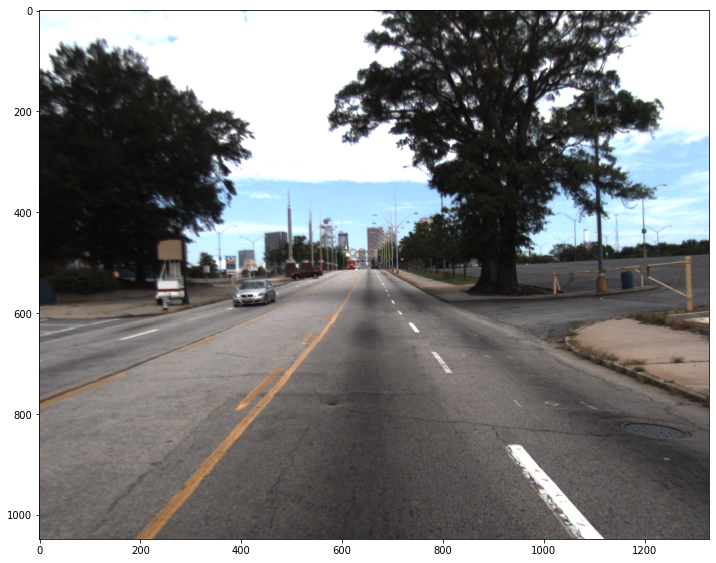

In [2]:
im = cv2.imread('../graphics/track_image.png')
fig = figure(0, (12,12))
imshow(im[:,:,(2,1,0)])

In [3]:
# Extrinsics parameters - this is the relative translation and 
# rotation between the camera and rear vehicle axle
tvec = np.array([[0], [1549.], [1750.]], dtype = 'float32')
rvec = np.array([[0.00], [0.03], [0.00]], dtype = 'float32')

In [4]:
#Extrinsic matrix
Omega = np.hstack((cv2.Rodrigues(rvec)[0], tvec))

In [5]:
#Intrinsic Matrix, from checker-board camera calibration
intrinsicP = np.array([[1236.6, 0, 687.8],
                        [0, 1232.9, 544.7], 
                        [0, 0, 1]])

Ok, so we have $\mathbf{\Lambda}$, $\mathbf{\Omega}$, and $\mathbf{\tau}$, and now our job is to compute $\mathbf{w}$ for each pixel $\mathbf{x}$.

$$
\lambda
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix} = 
\begin{bmatrix}
\phi_x & 0 & \delta_x \\
0 & \phi_y & \delta_y \\
0 & 0 & 1 
\end{bmatrix}
\begin{bmatrix}
\omega_{11} & \omega_{12} & \omega_{13} &\tau_1 \\
\omega_{21} & \omega_{22} & \omega_{23} &\tau_2 \\
\omega_{31} & \omega_{32} & \omega_{33} &\tau_3 \\
\end{bmatrix}
\begin{bmatrix}
u \\
v \\
w \\
1
\end{bmatrix}
$$

- How do we solve for $\mathbf{w}$?
- Well, we can't. But it's for a good reason - as we saw earlier, we can't uniquely solve for world coordinates, give image coordinate - images do not provide depth information.
- We have to make one more assumption, in this case we'll assume the world is flat + static, ($v = 0$)
- This assumption simplifies our equations in a nice way:

$$
\lambda
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix} = 
\begin{bmatrix}
\phi_x & 0 & \delta_x \\
0 & \phi_y & \delta_y \\
0 & 0 & 1 
\end{bmatrix}
\begin{bmatrix}
\omega_{11} & \omega_{13} &\tau_1 \\
\omega_{21} & \omega_{23} &\tau_2 \\
\omega_{31} & \omega_{33} &\tau_3 \\
\end{bmatrix}
\begin{bmatrix}
u \\
w \\
1
\end{bmatrix}
$$

Let's define one more matrix, $\mathbf{\phi = \Lambda} \begin{bmatrix}\mathbf{\Omega} & \mathbf{\tau} \end{bmatrix}$.

$$
\lambda
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix} = 
\begin{bmatrix}
\phi_{11} & \phi_{12} & \phi_{13}\\
\phi_{21} & \phi_{22} & \phi_{23}\\
\phi_{31} & \phi_{32} & \phi_{33}\\
\end{bmatrix}
\begin{bmatrix}
u \\
w \\
1
\end{bmatrix}
$$

- Now, we're getting somewhere!

In [6]:
#w = 0 effectively removes the second row of our extrtinsic matrix. 
# Let's go ahead and multiply our intrinsic and extrinsic matrix
phi = np.dot(intrinsicP, Omega[:,[0,2,3]])

In [7]:
phi

array([[ 1.21541268e+03,  7.24582955e+02,  1.20365000e+06],
       [-1.63385484e+01,  5.44454909e+02,  2.86298710e+06],
       [-2.99954992e-02,  9.99550045e-01,  1.75000000e+03]])

Now we can solve for $w$ just by multipling both sides by  $\mathbf{\phi}^{-1}$!

In [8]:
phiInv = np.linalg.inv(phi)

In [9]:
phiInv

array([[ 8.08305049e-04,  2.74862102e-05, -6.00919450e-01],
       [ 2.42564277e-05, -9.15932168e-04,  1.48177470e+00],
       [-0.00000000e+00,  5.23625430e-07, -2.85218771e-04]])

Next, to project our image into world space, we need to know the coordinates of each pixel in our image. Setting this up:

In [10]:
allPixelIndices = np.zeros((im.shape[0]*im.shape[1], 2))

#This is just a cartesian product:
for i, element in enumerate(itertools.product(range(im.shape[1]), 
                                              range(im.shape[0]))):
    allPixelIndices[i, :] = element

In [11]:
print(allPixelIndices.shape, allPixelIndices)

(1391744, 2) [[0.000e+00 0.000e+00]
 [0.000e+00 1.000e+00]
 [0.000e+00 2.000e+00]
 ...
 [1.327e+03 1.045e+03]
 [1.327e+03 1.046e+03]
 [1.327e+03 1.047e+03]]


We also would like the RGB value for each of these pixels:

In [12]:
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

raveledRGB = np.vstack((b.T.ravel(), g.T.ravel(), r.T.ravel())).T

In [13]:
raveledRGB

array([[247, 255, 255],
       [244, 255, 255],
       [242, 255, 255],
       ...,
       [ 76,  79,  77],
       [ 83,  82,  77],
       [ 81,  77,  77]], dtype=uint8)

Projection Time!

In [14]:
#Convert to homogeneous coords
allPixelsPadded = np.hstack((allPixelIndices, np.ones((allPixelIndices.shape[0], 1))))

In [15]:
allPixelsPadded

array([[0.000e+00, 0.000e+00, 1.000e+00],
       [0.000e+00, 1.000e+00, 1.000e+00],
       [0.000e+00, 2.000e+00, 1.000e+00],
       ...,
       [1.327e+03, 1.045e+03, 1.000e+00],
       [1.327e+03, 1.046e+03, 1.000e+00],
       [1.327e+03, 1.047e+03, 1.000e+00]])

In [16]:
#Project by multiplying by inverse matrix
worldCoords = np.dot(phiInv, allPixelsPadded.T)

#Convert from homogeneous to cartesian coordinates
worldCoords = worldCoords/worldCoords[2,:]

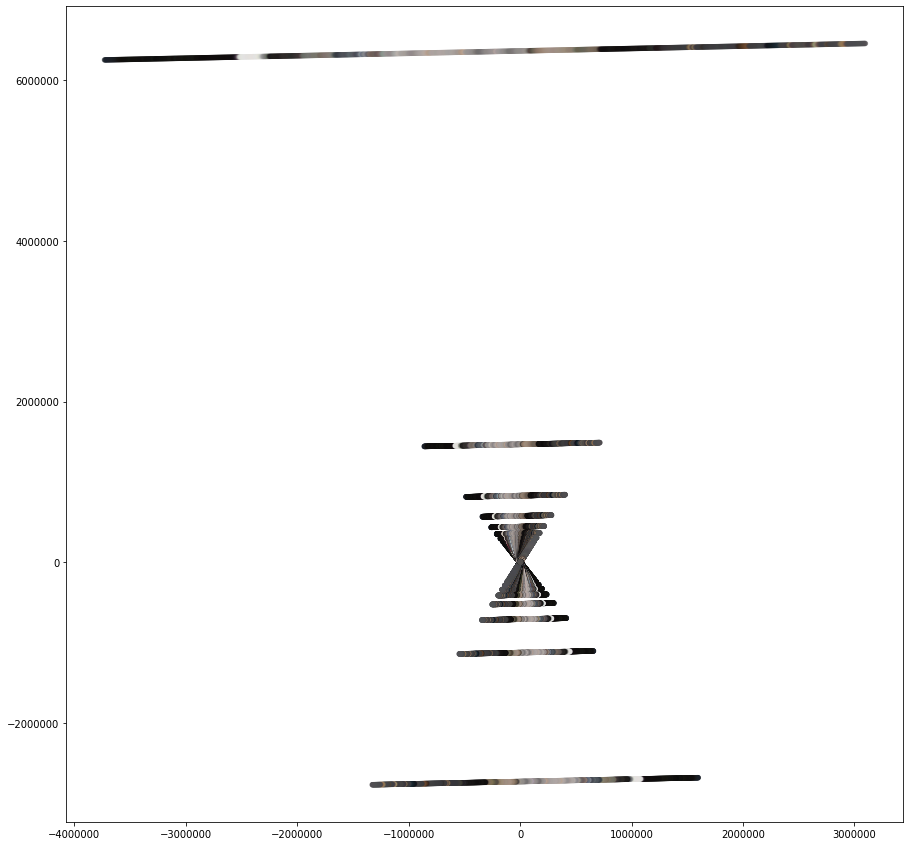

In [17]:
#Let's visualize our projected points - might be a little slow!
fig = figure(0, (15,15))
scatter(worldCoords[0, :], worldCoords[1,:], c = raveledRGB/255., s = 20, alpha = 0.5)

It's a little hard to tell whats going on here - let's zoom in!

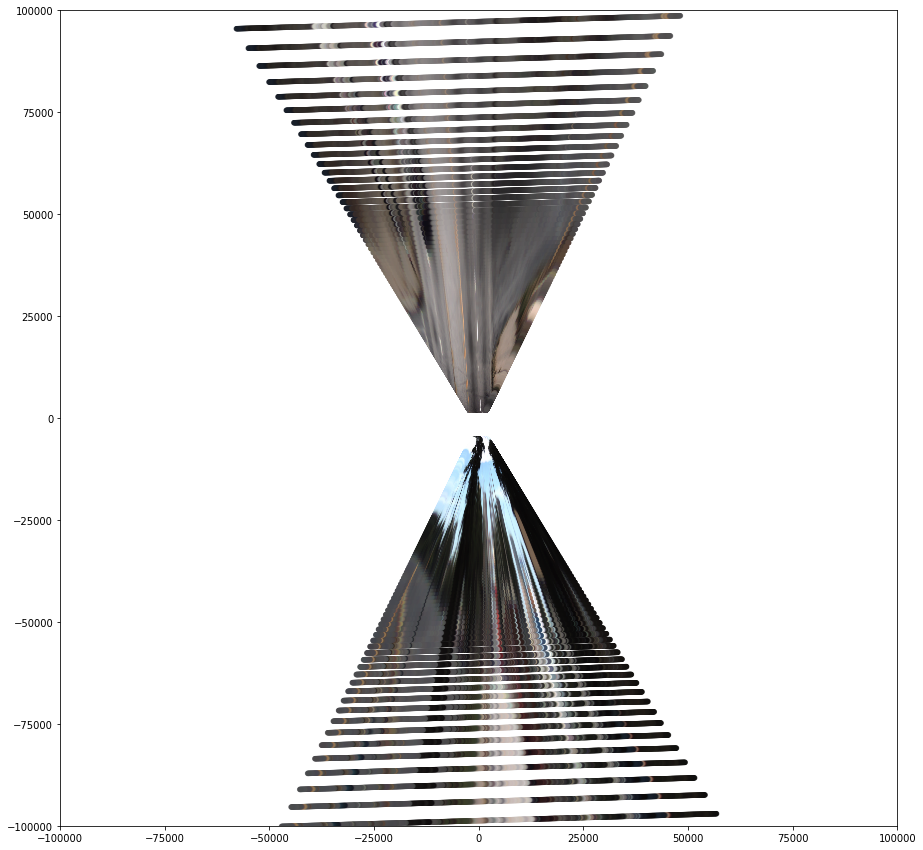

In [18]:
fig = figure(0, (15,15))
scatter(worldCoords[0, :], worldCoords[1,:], c = raveledRGB/255., s = 20, alpha = 0.5)
xlim([-100000, 100000]);
ylim([-100000, 100000]);

- Now, we're getting somewhere! A few observations: 
1. Points above the horizon are projected behind the car - this is a side-effect of how the pinhole camera model works. Let's filters these points out.
2. We're in mm becuase our camera paremters our in mm, would probably be nice to be in m. 
3. At far away distances we see gaps, this is becuase we're projecting **each pixel** into world space individually, so rows of pixels get "spread out" as we go further and further into world space.

In [19]:
minWorldDist = 1.0
maxLookAheadDist = 45.0

indicesToPlot = np.logical_and(worldCoords[1,:] > minWorldDist, worldCoords[1,:]< maxLookAheadDist*1000.)
wC = (worldCoords[:2, indicesToPlot]/1000)

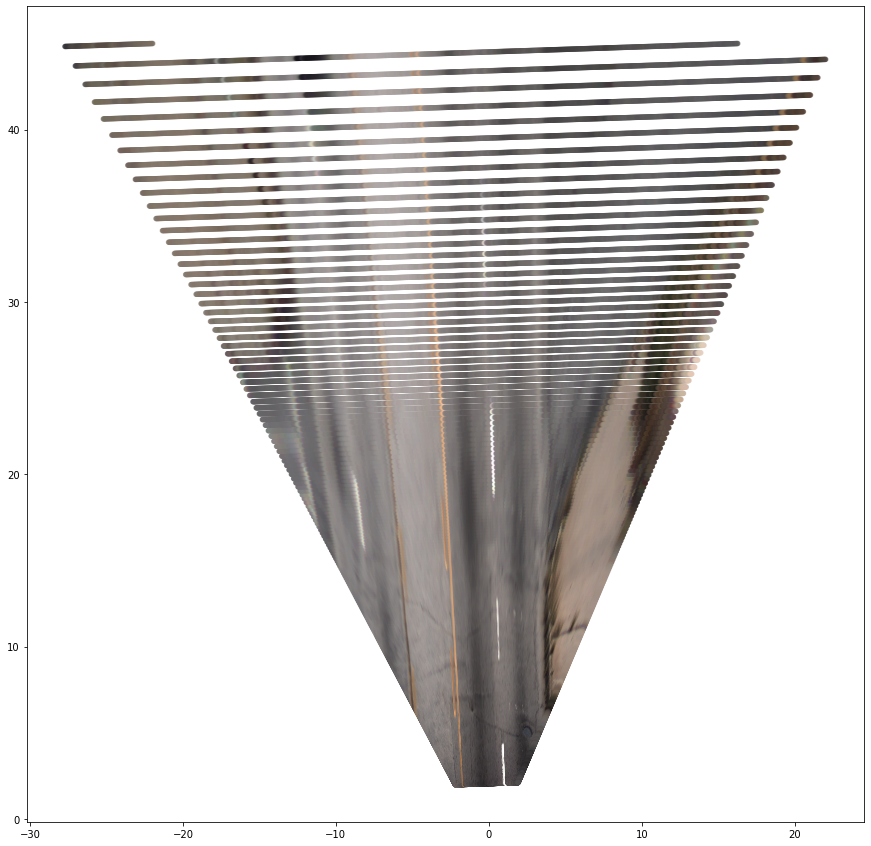

In [20]:
fig = figure(0, (15,15))
scatter(wC[0, :], wC[1,:], c = raveledRGB[indicesToPlot,:]/255., s = 20, alpha = 0.5)

## We win!